**Imports the 'os' module.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

**Iterates through files in specified directory.**

In [ ]:
path = "/content/drive/MyDrive/CCS/Computer Vision/Computer Vision Dataset/train/"

**Prints the list of files in 'path'.**

In [ ]:
print(os.listdir(path))

['nike', 'converse', 'adidas']


**Prints file names and their counts.**

In [ ]:
for i in os.listdir(path):
  print(i, len(os.listdir(path + i)))

nike 237
converse 237
adidas 237


**Imports image preprocessing from Keras and matplotlib.**

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

**Loads an image file.**

In [ ]:
img = image.load_img(path + 'nike/38.jpg')

**Loads an image file.**

In [ ]:
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


**Displays the loaded image.**

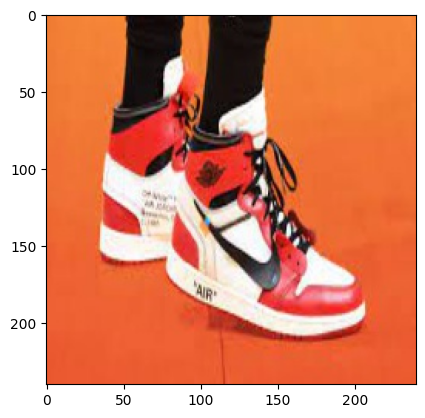

In [ ]:
plt.imshow(img)

**Converts the loaded image to an array.**

In [ ]:
img = image.img_to_array(img)

**Displays the type and shape of the image array.**

In [ ]:
print(type(img), img.shape)

<class 'numpy.ndarray'> (240, 240, 3)


**Imports Sequential model from Keras.**

In [ ]:
from keras.models import Sequential
import keras

**Defines a convolutional neural network model with specified architecture.**

In [ ]:
img_shape = (250, 250, 3)
num_classes = 3

model = keras.Sequential([
    keras.Input(shape = img_shape),
    keras.layers.Conv2D(40, kernel_size = (5, 5), strides = (1,2), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (5, 5), strides = (1,1), padding = 'same'),
    keras.layers.Conv2D(60, kernel_size = (5, 5), strides = (2, 2), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (5, 5), strides = (1,1), padding = 'same'),
    keras.layers.Conv2D(80, kernel_size = (3, 3), strides = (1,1), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1,1), padding = 'same'),
    keras.layers.Conv2D(110, kernel_size = (3, 3), strides = (1,1), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (3, 3), strides = (1,1), padding = 'same'),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(num_classes, activation = 'softmax')
])

**Displays the summary of the defined model.**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 246, 123, 40)      3040      
                                                                 
 max_pooling2d (MaxPooling2  (None, 246, 123, 40)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 121, 60, 60)       60060     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 121, 60, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 119, 58, 80)       43280     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 119, 58, 80)       0

**Configures model for training with Adam optimizer, categorical crossentropy loss, and accuracy, precision, recall metrics.**

In [ ]:
adam = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])

**Imports image data generator from Keras.**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


**Defines image data augmentation configurations for training data.**

In [ ]:

train_X = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 20,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    vertical_flip=True
)

**Creates a generator for training data from the specified directory, with defined image augmentation settings.**

In [ ]:
train_gen = train_X.flow_from_directory(path,
                                        target_size = (250, 250),
                                        batch_size = 30,
                                        class_mode = 'categorical')

Found 711 images belonging to 3 classes.


**Prints batch images and labels with shapes from training data generator.**

In [ ]:
for i, j in train_gen:
    print(i, j)
    print(i.shape, j.shape)
    break

[[[[0.06097643 0.05705487 0.08842742]
   [0.05825382 0.05433226 0.08570481]
   [0.05490196 0.0509804  0.08235294]
   ...
   [0.24294764 0.08934502 0.02102477]
   [0.26776287 0.11762093 0.06774978]
   [0.34057498 0.18754002 0.14239512]]

  [[0.0619978  0.05807623 0.08944879]
   [0.05723246 0.05331089 0.08468344]
   [0.05490196 0.0509804  0.08235294]
   ...
   [0.2337121  0.08095089 0.01536401]
   [0.27440172 0.12477048 0.07796341]
   [0.35538474 0.20132844 0.15567283]]

  [[0.06247104 0.05854947 0.08992203]
   [0.0562111  0.05228953 0.08366209]
   [0.05490196 0.0509804  0.08235294]
   ...
   [0.24035098 0.08810043 0.02557764]
   [0.28104058 0.13192002 0.08817705]
   [0.3701945  0.21511683 0.16895056]]

  ...

  [[0.13994122 0.11363786 0.07787137]
   [0.14230932 0.13188703 0.10332262]
   [0.14045204 0.13277549 0.10949981]
   ...
   [0.7311858  0.48956853 0.2998826 ]
   [0.73973113 0.498488   0.30568877]
   [0.7435234  0.5024318  0.30966508]]

  [[0.17612417 0.10637438 0.07135475]
   [0.1

**Displays the 22nd image from the batch.**

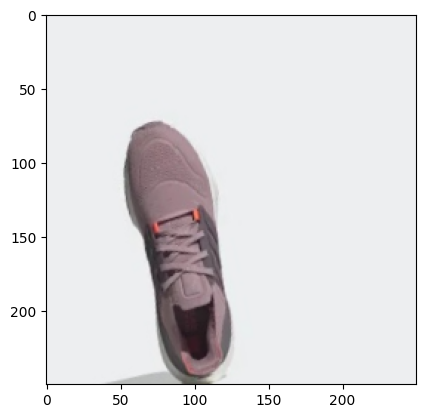

In [ ]:
plt.imshow(i[25])

**Trains model with training data generator for 30 epochs.**

In [ ]:
hist = model.fit(train_gen, epochs=30, use_multiprocessing=True, workers=4)

Epoch 1/30
24/24 [==============================] - 40s 905ms/step - loss: 906.9424 - accuracy: 0.3333 - precision: 0.3367 - recall: 0.1421
Epoch 2/30
24/24 [==============================] - 17s 540ms/step - loss: 1.0996 - accuracy: 0.3235 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/30
24/24 [==============================] - 14s 445ms/step - loss: 1.0990 - accuracy: 0.3347 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/30
24/24 [==============================] - 15s 496ms/step - loss: 1.0991 - accuracy: 0.3333 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/30
24/24 [==============================] - 14s 506ms/step - loss: 1.0993 - accuracy: 0.3333 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/30
24/24 [==============================] - 15s 551ms/step - loss: 1.0992 - accuracy: 0.3235 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/30
24/24 [==============================] - 18s 549ms/step - loss: 1.0988 - accuracy: 0.3277 - precision: 0.0000e+00 - rec